# Experiment 1 
## The Influence of Stimulus Onset Asynchrony on Masked Priming Effect in Visual Word Recognition

Here is some cleaned up and commented code to replicate what we did in class today.


If necessary (e.g. working on UCloud), install the necessary packages

In [1]:
#%pip install jsonlines
#%pip install seaborn

Import the libraries we will need

In [2]:
import jsonlines                        # used to turn the huge glob of data from lab.js into a pandas dataframe
import pandas as pd                     # used to organize the data in columns and rows
import seaborn as sns                   # used to make pretty pictures :-)
from matplotlib import pyplot as plt    # used to touch up the figures that `seaborn`` makes

Wrangle the data into a form we can use to make figures with `seaborn`

In [6]:
#raw = '/PATH/TO/YOUR/DATA/jatos_results_20230920125013.txt'                                                                 # your path  

raw = '/Users/ethan/Documents/GitHub/ExPsyLing/Experiments/Experiment1/data/jatos_results_20230920125013.txt'  # my path


###########################################################################

# I copied this section from here: https://forum.cogsci.nl/discussion/8257/problem-with-jatos-result-conversion
# I think I would write it slightly differently, but hey, it works, and I didn't know how to do this before I found this post, so I'm not complaining

i = 0                                                          # set counter variable "i" to zero

with jsonlines.open(raw) as reader:                            # make a "reader" variable with the lab.js data (which is stored in "JSON" format)
    for line in reader:                                        # loop through every line in the lab.js JSON data
        if i == 0:                                             # check if i equals zero. If it does, then
            df = pd.DataFrame(line)                             # make a new pandas dataframe called "df" 
            i += 1                                              # add 1 to i
        else:                                                  # if i does not equal zero 
            df = pd.concat([df, pd.DataFrame(line)])           # get the next line of the json file, convert it to a dataframe, and stick it on the bottom of "df" 
            i += 1                                            # I don't think you actually  need this line. If it is running, then i already does not equal zero, so what's the point?

df['url'] = df['url'].ffill()                                   # fill in the column with the participant ID numbers
df['url'] = [int(x['srid']) for x in list(df['url'])]           # get the ID numbers out of the "dictionaries" and re-write the url column with the extracted ID numbers
df.rename(columns={'url': 'ID'}, inplace=True)                  # rename the url column as "ID"
del df['meta']                                                  # delete the "meta" column. I put this here just to show you how to delete a column


###########################################################################


df = df[df['sender'] == 'target']                           # make a dataframe with only the data from the "target" rows
df = df[df['condition'] != 'practice']                      # make a dataframe that only includes the "real" data (not the data from the practice round)

df['response_action'] = df['response_action'].replace('keypress(n)', 'n') 
df['response_action'] = df['response_action'].replace('keypress(m)', 'm')
df['correct'] = df['response_action'] == df['correct_response']


#df.to_csv('PATH/TP/WHERE/I/WANT/TO/SAVE/MY/DATA/raw_data.csv') # save the raw data as a csv file, if you want
df.to_csv('/Users/ethan/Documents/GitHub/ExPsyLing/Experiments/Experiment1/data/data.csv')

Some sanity checks.

In [5]:
# number of participants
len(set(df['ID']))


32

In [6]:
# are there only data from "target" events (when participants responded to the target stimuli)?
set(df['sender'])

{'target'}

In [7]:
# how many of each combination of conditions are there?
df['condition'].value_counts()

Con_Synth          960
Con_Nat            960
Inc_Nat_Nat        480
Inc_Nat_Synth      480
Inc_Synth_Nat      480
Inc_Synth_Synth    480
Name: condition, dtype: int64

In [8]:
# how many correct (True) vs. incorrect answers are there?
df['correct'].value_counts()

True     2962
False     878
Name: correct, dtype: int64

There are other checks you could do. Think of some, and try them!

<AxesSubplot:xlabel='soa_condition', ylabel='duration'>

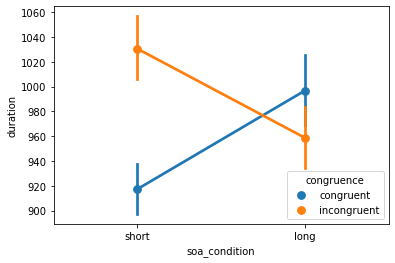

In [9]:
# Make a plot of the basic effects with seaborn
sns.pointplot(data = df, x = 'soa_condition', y = 'duration', hue = 'congruence')                                                                      # take away the top and side of the box. Personal aesthetic choice!

There are a few easy things we could do to improve our plots...

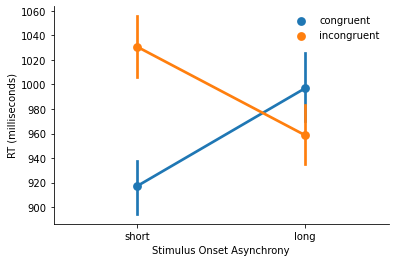

In [10]:
ax = sns.pointplot(data = df, x = 'soa_condition', y = 'duration', hue = 'congruence')  # make the plot
ax.set(xlabel='Stimulus Onset Asynchrony', ylabel='RT (milliseconds)')                  # give the axes more understandable labels
plt.legend(frameon = False)                                                             # remove the box and move the legend so it doesn't obscure the data
sns.despine()                                                                           # remove top and bottom of the frame. Purely aesthetic; personal choice